# Exp1: NB vs SVM #

Summary: 

It seems a linear Support Vector Machine performs better then Naive Bayes for all targets except Climate Change.

(Trying some variations in parameter setting for vectorizer or classifiers - not shown here - do not seem to improve scores)

In [36]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_predict, StratifiedKFold
from sklearn.metrics import fbeta_score

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [12]:
data = pd.read_csv(open('semeval2016-task6-trainingdata.txt'), '\t', index_col=0)

In [13]:
targets = list(data.Target.unique()) + ['All']

In [24]:
classifiers = MultinomialNB(), LinearSVC(C=0.1), SVC(C=5)

In [37]:
results = pd.DataFrame(np.zeros(len(targets), 
                       dtype=[('MultinomialNB', 'f'),
                              ('LinearSVC', 'f'),
                              ('SVC' , 'f')]),
                      index=targets)

In [38]:
for target in targets:
    print 80 * "="
    print target
    print 80 * "="

    target_data = data[data.Target == target] if target != 'All' else data

    cv = StratifiedKFold(target_data.Stance, n_folds=5, shuffle=True,
                         random_state=1)
    
    for clf in classifiers:
        print clf, '\n'
        pipeline = Pipeline([('vect', CountVectorizer(decode_error='ignore')),
                             ('clf', clf)])
        
        pred_stances = cross_val_predict(pipeline, target_data.Tweet,
                                         target_data.Stance, cv=cv)
        print classification_report(target_data.Stance, pred_stances, digits=4)

        macro_f = fbeta_score(target_data.Stance, pred_stances, 1.0,
                              labels=['AGAINST', 'FAVOR'], average='macro')
        print 'macro-average of F-score(FAVOR) and F-score(AGAINST): {:.4f}\n'.format(macro_f)
        
        clf_name = str(clf).split('(')[0]
        results.at[target, clf_name] = macro_f

Atheism
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

             precision    recall  f1-score   support

    AGAINST     0.6464    0.9803    0.7791       304
      FAVOR     0.6667    0.1739    0.2759        92
       NONE     0.6786    0.1624    0.2621       117

avg / total     0.6574    0.6491    0.5709       513

macro-average of F-score(FAVOR) and F-score(AGAINST): 0.5275

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) 

             precision    recall  f1-score   support

    AGAINST     0.7368    0.8750    0.8000       304
      FAVOR     0.5667    0.3696    0.4474        92
       NONE     0.5870    0.4615    0.5167       117

avg / total     0.6721    0.6901    0.6722       513

macro-average of F-score(FAVOR) and F-score(AGAINST): 0.6237

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,

In [39]:
results

,MultinomialNB,LinearSVC,SVC
Atheism,0.527474,0.623684,0.372093
Climate Change is a Real Concern,0.550000,0.536950,0.349259
Feminist Movement,0.540418,0.558974,0.330645
Hillary Clinton,0.517168,0.574249,0.361000
Legalization of Abortion,0.538462,0.632597,0.356457
All,0.547065,0.590990,0.322907


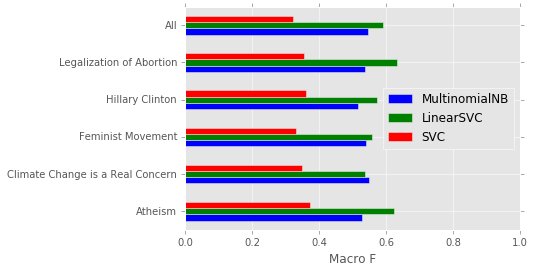

In [40]:
results.plot(kind='barh')
axes = plt.gca()
axes.set_xlim([0,1.0])
axes.set_xlabel('Macro F')